# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import sys
print("Python %s" % sys.version)
import os
import random, copy, time
from collections import namedtuple, deque

Python 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) 
[GCC 7.3.0]


In [2]:
import numpy as np
print("NumPy %s" % np.__version__)

NumPy 1.16.5


In [3]:
import torch
print("PyTorch %s" % torch.__version__)
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

PyTorch 1.2.0


In [4]:
import matplotlib
print("matplotlib %s" % matplotlib.__version__)
import matplotlib.pyplot as plt

# Set plotting options
%matplotlib inline

matplotlib 3.1.1


In [5]:
from unityagents import UnityEnvironment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [26]:
env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [7]:
env

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [8]:
env.brain_names

['TennisBrain']

In [9]:
env.brains

{'TennisBrain': <unityagents.brain.BrainParameters at 0x7fa9f36acba8>}

In [27]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [28]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [12]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.10000000149011612


When finished, you can close the environment.

In [13]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### Hyperparameters

In [6]:
BUFFER_SIZE = int(1e6)     # replay buffer size
BATCH_SIZE = 128           # minibatch size
GAMMA = 0.99               # discount factor
TAU = 1e-3                 # for soft update of target parameters
SEED = 2                   # random seed
LR_ACTOR = 1e-4            # learning rate of the actor 
LR_CRITIC = 1e-3           # l earning rate of the critic
WEIGHT_DECAY = 0           # L2 weight decay
SIGMA = 0.1                # standard deviation for noise

### Actor-Critic Models

In [12]:
class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, num_agents, state_size, action_size, seed, 
                 fc1_units=512, fc2_units=256):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        # weight initialization gains 
        self.relu_gain = nn.init.calculate_gain('relu')
        self.tanh_gain = nn.init.calculate_gain('tanh')
        # layers
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.bn1 = nn.BatchNorm1d(fc1_units)
        
        self.reset_parameters()

    def reset_parameters(self):
        nn.init.xavier_uniform_(self.fc1.weight.data, self.relu_gain)
        nn.init.xavier_uniform_(self.fc2.weight.data, self.relu_gain)
        nn.init.xavier_uniform_(self.fc3.weight.data, self.tanh_gain)

    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        x = self.bn1(self.fc1(state)).relu()
        x = self.fc2(x).relu()
        return self.fc3(x).tanh()

In [13]:
class Critic(nn.Module):
    """Critic (Value) Model."""

    def __init__(self, num_agents, state_size, action_size, seed, 
                 fcs1_units=512, fc2_units=256, fc3_units=128):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fcs1_units (int): Number of nodes in the first hidden layer
            fc2_units (int): Number of nodes in the second hidden layer
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        # weight initialization gains 
        self.relu_gain = nn.init.calculate_gain('relu')
        self.linear_gain = nn.init.calculate_gain('linear')
        # layers
        self.fcs1 = nn.Linear(num_agents*state_size, fcs1_units)
        self.fc2 = nn.Linear(fcs1_units+(num_agents*action_size), fc2_units)
        self.fc3 = nn.Linear(fc2_units, fc3_units)
        self.fc4 = nn.Linear(fc3_units, 1)
        self.bn1 = nn.BatchNorm1d(fcs1_units)
        
        self.reset_parameters()

    def reset_parameters(self):
        nn.init.xavier_uniform_(self.fcs1.weight.data, self.relu_gain)
        nn.init.xavier_uniform_(self.fc2.weight.data, self.relu_gain)
        nn.init.xavier_uniform_(self.fc3.weight.data, self.relu_gain)
        nn.init.xavier_uniform_(self.fc4.weight.data, self.linear_gain)

    def forward(self, state, action):
        """Build a critic (value) network that maps (
           state, action) pairs -> Q-values."""
        xs = self.bn1(self.fcs1(state)).relu()
        x = torch.cat((xs, action), dim=1)
        x = self.fc2(x).relu()
        x = self.fc3(x).relu()
        return self.fc4(x)

### Agent

In [14]:
class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, buffer_size, batch_size, seed, device):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
            device (torch.device): - (type='cuda', index=0) for GPU 0
                                   - (type='cpu') for CPU
        """
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", 
                                     field_names=["state", "action", "reward", 
                                                  "next_state", "done"])
        self.seed = random.seed(seed)
        self.device = device
    
    def add(self, states, actions, rewards, next_states, dones):
        """Add a new experience to memory."""
        e = self.experience(states, actions, rewards, next_states, dones)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack(
            [e.state for e in experiences if e is not None]
        )).float().to(self.device)
        
        actions = torch.from_numpy(np.vstack(
            [e.action for e in experiences if e is not None]
        )).float().to(self.device)
        
        rewards = torch.from_numpy(np.vstack(
            [e.reward for e in experiences if e is not None]
        )).float().to(self.device)
        
        next_states = torch.from_numpy(np.vstack(
            [e.next_state for e in experiences if e is not None]
        )).float().to(self.device)
        
        dones = torch.from_numpy(np.vstack(
            [e.done for e in experiences if e is not None]
        ).astype(np.uint8)).float().to(self.device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [15]:
class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + \
             self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state

__Multi-Agent Decentralized-Actor Centralized-Critic Algorithm__ `[1]`
![ma-decentralizedActor-centralizedCritic](./images/ma-decentralizedActor-centralizedCritic.png)

In [16]:
class Agent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, index, num_agents, state_size, action_size, 
                 random_seed, device):
        """Initialize an Agent object.
        
        Params
        ======
            num_agents (int): number of agents
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.index = index 
        self.num_agents = num_agents
        self.state_size = state_size
        self.action_size = action_size
        self.random_seed = random_seed
        self.seed = random.seed(random_seed)
        self.device = device

        # Actor Network (w/ Target Network)
        self.actor_local = Actor(self.num_agents, self.state_size, self.action_size, 
                                 self.random_seed).to(self.device)
        self.actor_target = Actor(self.num_agents, self.state_size, self.action_size, 
                                  self.random_seed).to(self.device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)

        # Critic Network (w/ Target Network)
        self.critic_local = Critic(self.num_agents, self.state_size, self.action_size, 
                                   self.random_seed).to(self.device)
        self.critic_target = Critic(self.num_agents, self.state_size, self.action_size, 
                                    self.random_seed).to(self.device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, 
                                           weight_decay=WEIGHT_DECAY)

        # Noise process
        self.noise = OUNoise(self.action_size, self.random_seed, sigma=SIGMA)

    def sample_and_learn(self, agents, shared_memory):
        # Learn, if enough samples are available in memory
        if len(shared_memory) > BATCH_SIZE:
            for _ in range(5):
                experiences = shared_memory.sample()
                self.learn(agents, experiences, GAMMA)

    def act(self, state, add_noise=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().to(self.device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            action += self.noise.sample()
        return np.clip(action, -1.0, 1.0)

    def reset(self):
        self.noise.reset()

    def learn(self, agents, experiences, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states_flat, actions_flat, rewards_flat, next_states_flat, \
            dones_flat = experiences

        states = states_flat.reshape(-1, self.num_agents, self.state_size)
        actions = actions_flat.reshape(-1, self.num_agents, self.action_size)
        rewards = rewards_flat.reshape(-1, self.num_agents)
        next_states = next_states_flat.reshape(-1, self.num_agents, 
                                               self.state_size)
        dones = torch.max(dones_flat, dim=1).values.reshape(-1,1)
        
        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        next_actions = ()
        for i, agent in enumerate(agents):
            next_actions += (agent.actor_target(next_states[:,i]),)
        next_actions_flat = torch.cat(next_actions, dim=1)
        Q_targets_next = self.critic_target(next_states_flat, next_actions_flat)
        # Compute Q targets for current states (y_i)
        Q_targets = rewards[:,self.index].reshape(-1,1) + \
                    (gamma * Q_targets_next * (1 - dones))
        # Compute critic loss
        Q_expected = self.critic_local(states_flat, actions_flat)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()

        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        pred_actions = ()
        for i, agent in enumerate(agents):
            pred_actions += (agent.actor_local(states[:,i]),)
        pred_actions_flat = torch.cat(pred_actions, dim=1)
        actor_loss = -self.critic_local(states_flat, pred_actions_flat).mean()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), 
                                             local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + \
                                    (1.0-tau)*target_param.data)

In [20]:
# check if CUDA is available
use_cuda = torch.cuda.is_available()
print("Use CUDA:",  use_cuda)

Use CUDA: True


In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [22]:
# agent-0, agent-1
agents = [Agent(index=0, num_agents=num_agents, state_size=state_size, 
                action_size=action_size, random_seed=SEED, device=device),
          Agent(index=1, num_agents=num_agents, state_size=state_size, 
                action_size=action_size, random_seed=SEED, device=device),]

In [23]:
for i, agent in enumerate(agents):
    print("=== Agent %d" % (i+1), "="*64)
    print(agent.actor_local)
    print(agent.actor_target)
    print(agent.actor_optimizer)
    print(agent.critic_local)
    print(agent.critic_target)
    print(agent.critic_optimizer)

=== Agent 1 ================================================================
Actor(
  (fc1): Linear(in_features=24, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=2, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Actor(
  (fc1): Linear(in_features=24, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=2, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
)
Critic(
  (fcs1): Linear(in_features=48, out_features=512, bias=True)
  (fc2): Linear(in_features=516, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features

### Training

In [24]:
def maddpg(n_episodes, max_t, print_every, random_seed, device):
    # Replay memory
    shared_memory = ReplayBuffer(BUFFER_SIZE, BATCH_SIZE, 
                                 random_seed, device)
    
    acc_scores = []
    acc_scores_window = deque(maxlen=100)  # last 100 scores
    for i_episode in range(1, n_episodes+1):
        # reset the environment
        env_info = env.reset(train_mode=True)[brain_name]
        # get the current state (for each agent)
        states = env_info.vector_observations
        states_flat = np.hstack(states)
        # reset agents
        for agent in agents:
            agent.reset()
        # initialize the score (for each agent)
        max_scores = 0
        actions = np.zeros((num_agents, action_size))
        for t in range(max_t):
            # get action
            for i, agent in enumerate(agents):
                actions[i] = agent.act(states[i].reshape(1,-1), add_noise=True)
            actions_flat = np.hstack(actions)
            # send all actions to tne environment
            env_info = env.step(actions)[brain_name]
            # get next states, rewards and done flags (for each agent)
            next_states = env_info.vector_observations
            next_states_flat = np.hstack(next_states)
            rewards = env_info.rewards
            rewards_flat = np.array(rewards)
            dones = env_info.local_done
            dones_flat = np.array(dones)
            # update shared memory
            shared_memory.add(states_flat, actions_flat, rewards_flat, 
                              next_states_flat, dones_flat)
            # update state
            states = next_states
            states_flat = next_states_flat
            # accumulate rewards
            max_scores += max(rewards)
            # exit loop if episode finished
            if np.any(dones):
                break
        
        # sample and learn
        for agent in agents:
            agent.sample_and_learn(agents, shared_memory)

        # save most recent scores
        acc_scores.append(max_scores)
        acc_scores_window.append(max_scores)
        
        # model checkpoints
        for i, agent in enumerate(agents):
            torch.save(agent.actor_local.state_dict(), "agent%d_actor.pth" % i)
            torch.save(agent.critic_local.state_dict(), "agent%d_critic.pth" % i)
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, 
                                                           np.mean(acc_scores_window)), 
              end="")
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, 
                                                               np.mean(acc_scores_window)))
        if np.mean(acc_scores_window)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(
                  i_episode-100, np.mean(acc_scores_window)))
            break
            
    return acc_scores

In [25]:
MAX_EPISODES = 10000

tic = time.time()
scores = maddpg(n_episodes=MAX_EPISODES, max_t=1000, 
                print_every=1000, random_seed=SEED, device=device)
toc = time.time()
print()
print("Runtime (in seconds) %d" % int(toc-tic))

Episode 1000	Average Score: 0.00
Episode 2000	Average Score: 0.04
Episode 3000	Average Score: 0.06
Episode 4000	Average Score: 0.08
Episode 5000	Average Score: 0.16
Episode 6000	Average Score: 0.10
Episode 7000	Average Score: 0.16
Episode 7778	Average Score: 0.52
Environment solved in 7678 episodes!	Average Score: 0.52

Runtime (in seconds) 1330


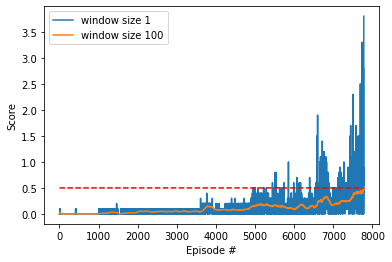

In [29]:
scores = np.array(scores)
scores_window = [np.mean(scores[max(0,i-100):i+1]) 
                 for i in range(len(scores))]

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores, label="window size 1")
plt.plot(np.arange(1, len(scores)+1), scores_window, label="window size 100")
plt.plot(np.arange(1, len(scores)+1), [0.5]*len(scores), 
         linestyle='--', color='red')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

### GPU Utilization

```
while sleep 0.2; do
nvidia-smi --query-gpu=name,index,temperature.gpu,\
utilization.gpu,utilization.memory,\
memory.total,memory.free,memory.used --format=csv,noheader
done
```

```
GeForce GTX 1060, 0, 66, 34 %, 7 %, 6078 MiB, 5106 MiB, 972 MiB
GeForce GTX 1060, 0, 66, 27 %, 5 %, 6078 MiB, 5106 MiB, 972 MiB
GeForce GTX 1060, 0, 66, 20 %, 4 %, 6078 MiB, 5106 MiB, 972 MiB
GeForce GTX 1060, 0, 66, 3 %, 1 %, 6078 MiB, 5106 MiB, 972 MiB
GeForce GTX 1060, 0, 66, 13 %, 2 %, 6078 MiB, 5106 MiB, 972 MiB
GeForce GTX 1060, 0, 66, 28 %, 6 %, 6078 MiB, 5106 MiB, 972 MiB
GeForce GTX 1060, 0, 66, 26 %, 5 %, 6078 MiB, 5106 MiB, 972 MiB
GeForce GTX 1060, 0, 66, 27 %, 5 %, 6078 MiB, 5106 MiB, 972 MiB
GeForce GTX 1060, 0, 66, 30 %, 6 %, 6078 MiB, 5106 MiB, 972 MiB
GeForce GTX 1060, 0, 66, 31 %, 6 %, 6078 MiB, 5106 MiB, 972 MiB
GeForce GTX 1060, 0, 66, 21 %, 4 %, 6078 MiB, 5106 MiB, 972 MiB
GeForce GTX 1060, 0, 66, 4 %, 1 %, 6078 MiB, 5106 MiB, 972 MiB
GeForce GTX 1060, 0, 66, 25 %, 5 %, 6078 MiB, 5106 MiB, 972 MiB
GeForce GTX 1060, 0, 66, 28 %, 6 %, 6078 MiB, 5106 MiB, 972 MiB
GeForce GTX 1060, 0, 66, 30 %, 6 %, 6078 MiB, 5106 MiB, 972 MiB
GeForce GTX 1060, 0, 66, 31 %, 6 %, 6078 MiB, 5106 MiB, 972 MiB
GeForce GTX 1060, 0, 66, 28 %, 6 %, 6078 MiB, 5106 MiB, 972 MiB
GeForce GTX 1060, 0, 66, 27 %, 5 %, 6078 MiB, 5106 MiB, 972 MiB
GeForce GTX 1060, 0, 66, 31 %, 6 %, 6078 MiB, 5106 MiB, 972 MiB
```

In [31]:
saved_model_agent0_actor = {
    'num_agents': num_agents,
    'state_size': state_size,
    'action_size': action_size,
    'fc1_units': 512,
    'fc2_units': 256,
    'state_dict': agents[0].actor_local.state_dict(),
}

torch.save(saved_model_agent0_actor, './models/saved_model_agent0_actor.pth')

In [33]:
saved_model_agent0_critic = {
    'num_agents': num_agents,
    'state_size': state_size,
    'action_size': action_size,
    'fcs1_units': 512,
    'fc2_units': 256,
    'fc3_units': 128,
    'state_dict': agents[0].critic_local.state_dict(),
}

torch.save(saved_model_agent0_critic, './models/saved_model_agent0_critic.pth')

In [32]:
saved_model_agent1_actor = {
    'num_agents': num_agents,
    'state_size': state_size,
    'action_size': action_size,
    'fc1_units': 512,
    'fc2_units': 256,
    'state_dict': agents[1].actor_local.state_dict(),
}

torch.save(saved_model_agent1_actor, './models/saved_model_agent1_actor.pth')

In [34]:
saved_model_agent1_critic = {
    'num_agents': num_agents,
    'state_size': state_size,
    'action_size': action_size,
    'fcs1_units': 512,
    'fc2_units': 256,
    'fc3_units': 128,
    'state_dict': agents[1].critic_local.state_dict(),
}

torch.save(saved_model_agent1_critic, './models/saved_model_agent1_critic.pth')

In [35]:
env.close()

### Agent in Action

In [7]:
def load_saved_model_actor(filepath, device):
    saved_model = torch.load(filepath)
    actor = Actor(num_agents=saved_model['num_agents'], 
                  state_size=saved_model['state_size'], 
                  action_size=saved_model['action_size'], 
                  seed=SEED, 
                  fc1_units=saved_model['fc1_units'], 
                  fc2_units=saved_model['fc2_units']).to(device)
    actor.load_state_dict(saved_model['state_dict'])
    
    return actor

In [40]:
def load_saved_model_critic(filepath, device):
    saved_model = torch.load(filepath)
    critic = Critic(num_agents=saved_model['num_agents'], 
                    state_size=saved_model['state_size'], 
                    action_size=saved_model['action_size'], 
                    seed=SEED, 
                    fcs1_units=saved_model['fcs1_units'], 
                    fc2_units=saved_model['fc2_units'], 
                    fc3_units=saved_model['fc3_units']).to(device)
    critic.load_state_dict(saved_model['state_dict'])
    
    return critic

In [41]:
# check if CUDA is available
use_cuda = torch.cuda.is_available()
print("Use CUDA:",  use_cuda)

Use CUDA: True


In [42]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [43]:
agent0_actor_local = load_saved_model_actor('./models/saved_model_agent0_actor.pth', 
                                            device)
agent0_actor_local.eval()

Actor(
  (fc1): Linear(in_features=24, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=2, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [44]:
agent0_actor_target = load_saved_model_actor('./models/saved_model_agent0_actor.pth', 
                                             device)
agent0_actor_target.eval()

Actor(
  (fc1): Linear(in_features=24, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=2, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [45]:
agent0_critic_local = load_saved_model_critic('./models/saved_model_agent0_critic.pth', 
                                              device)
agent0_critic_local.eval()

Critic(
  (fcs1): Linear(in_features=48, out_features=512, bias=True)
  (fc2): Linear(in_features=516, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [46]:
agent0_critic_target = load_saved_model_critic('./models/saved_model_agent0_critic.pth', 
                                               device)
agent0_critic_target.eval()

Critic(
  (fcs1): Linear(in_features=48, out_features=512, bias=True)
  (fc2): Linear(in_features=516, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [47]:
agent1_actor_local = load_saved_model_actor('./models/saved_model_agent1_actor.pth', 
                                            device)
agent1_actor_local.eval()

Actor(
  (fc1): Linear(in_features=24, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=2, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [48]:
agent1_actor_target = load_saved_model_actor('./models/saved_model_agent1_actor.pth', 
                                             device)
agent1_actor_target.eval()

Actor(
  (fc1): Linear(in_features=24, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=2, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [49]:
agent1_critic_local = load_saved_model_critic('./models/saved_model_agent1_critic.pth', 
                                              device)
agent1_critic_local.eval()

Critic(
  (fcs1): Linear(in_features=48, out_features=512, bias=True)
  (fc2): Linear(in_features=516, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [50]:
agent1_critic_target = load_saved_model_critic('./models/saved_model_agent1_critic.pth', 
                                              device)
agent1_critic_target.eval()

Critic(
  (fcs1): Linear(in_features=48, out_features=512, bias=True)
  (fc2): Linear(in_features=516, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [51]:
agents = [Agent(index=0, num_agents=num_agents, state_size=state_size, 
                action_size=action_size, random_seed=SEED, device=device),
          Agent(index=1, num_agents=num_agents, state_size=state_size, 
                action_size=action_size, random_seed=SEED, device=device),]

In [52]:
agents[0].actor_local = agent0_actor_local
agents[0].actor_target = agent0_actor_target
agents[0].critic_local = agent0_critic_local
agents[0].critic_target = agent0_critic_target
agents[1].actor_local = agent1_actor_local
agents[1].actor_target = agent1_actor_target
agents[1].critic_local = agent1_critic_local
agents[1].critic_target = agent1_critic_target

In [64]:
env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [70]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions0 = agents[0].act(states[0].reshape(1, -1), add_noise=True)
        actions0 = np.clip(actions0, -1, 1)                # all actions between -1 and 1
        actions1 = agents[1].act(states[1].reshape(1, -1), add_noise=True)
        actions1 = np.clip(actions1, -1, 1)                # all actions between -1 and 1
        actions = np.hstack([actions0, actions1])
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        time.sleep(0.1)
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.10000000149011612
Score (max over agents) from episode 2: 1.9000000283122063
Score (max over agents) from episode 3: 0.30000000447034836
Score (max over agents) from episode 4: 1.2000000178813934
Score (max over agents) from episode 5: 0.20000000298023224


Record the action in mp4 format.

In [71]:
%%bash
ls -l ./results/mp4

total 1908
-rw-rw-r-- 1 eka eka 1949925 Nov 10 01:41 01.mp4


Convert the mp4 to GIF.

In [72]:
%%bash
ffmpeg -ss 2 -i ./results/mp4/01.mp4 -vf "fps=10,scale=640:-1:flags=lanczos,split[s0][s1];[s0]palettegen[p];[s1][p]paletteuse" ./results/gif/01.gif

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [73]:
env.close()

### Hardware Specifications and Software Versions

In [74]:
%%bash
cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.3 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.3 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


In [76]:
%%bash
nvidia-smi

Sun Nov 10 01:44:32 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.26       Driver Version: 440.26       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1060    Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   60C    P2    32W /  N/A |    998MiB /  6078MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [77]:
%%bash
pip freeze

absl-py==0.8.0
alabaster==0.7.12
anaconda-client==1.7.2
anaconda-project==0.8.3
asn1crypto==0.24.0
astor==0.7.1
astroid==2.2.5
astropy==3.2.1
atomicwrites==1.3.0
attrs==19.1.0
Babel==2.7.0
backcall==0.1.0
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.8.0
bitarray==1.0.1
bkcharts==0.2
bleach==3.1.0
bokeh==1.3.4
boto==2.49.0
Bottleneck==1.2.1
certifi==2019.9.11
cffi==1.12.3
chardet==3.0.4
Click==7.0
cloudpickle==1.2.2
clyent==1.2.2
colorama==0.4.1
contextlib2==0.5.5
cryptography==2.7
cycler==0.10.0
Cython==0.29.13
cytoolz==0.10.0
dask==2.3.0
decorator==4.4.0
defusedxml==0.6.0
distributed==2.3.2
docopt==0.6.2
docutils==0.15.2
entrypoints==0.3
et-xmlfile==1.0.1
fastcache==1.1.0
Flask==1.1.1
fsspec==0.4.0
gast==0.2.0
gevent==1.4.0
gmpy2==2.0.8
google-pasta==0.1.7
greenlet==0.4.15
grpcio==1.11.0
h5py==2.9.0
heapdict==1.0.0
html5lib==1.0.1
idna==2.8
imageio==2.5.0
imagesize==1.1.0
importlib-metadata==0.19
ipykernel==5.1.2
ipython==7.8.0
ipython-genutils==0.2.

### References

`[1]` Lowe, R., Wu, Y., Tamar, A., Harb, J., Abbeel, P., & Mordatch, I. (2017). _Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments_. ArXiv, abs/1706.02275.